# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m = 1
A = 0.03#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

Choose your grid

In [2]:
global loggrid=true
global bisection=false
global meshrefinement=false;

In [3]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
Nt=2.0^m*400.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [4]:
print(N)

400.0

In [5]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [6]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [7]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
end;

step size is  0.0025
the time step is 0.00125


hallo at analytic jacobian


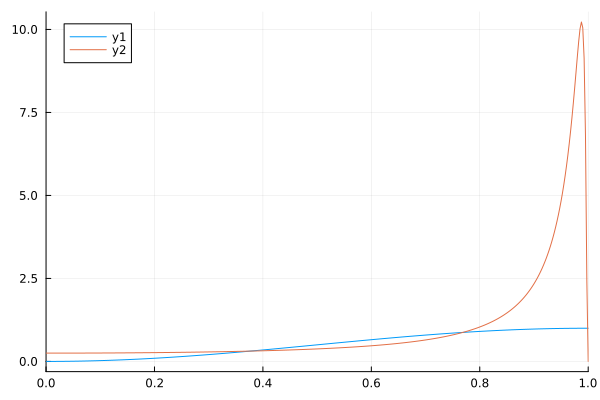

In [8]:
using Plots
plot([originalX[4:L-3] originalX[4:L-3]], [initX[4:L-3] analytic_jacobian(originalX[4:L-3])],xlim=[0,1])

In [9]:
#analytic_jacobian(originalX[4:L-3]);

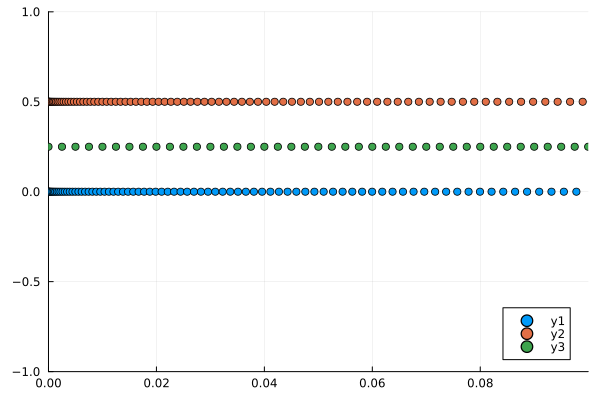

In [11]:
aux=chebyshev(N)
scatter([initX[4:L-3], aux, originalX], [zeros(length(initX))[4:L-3], zeros(length(aux)).+0.5, zeros(length(originalX)).+0.25],ylim=[-1,1],xlim=[0,0.1])

# Initial data of m β Ψ and Ψ,x

In [538]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [539]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [540]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [528]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);

state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

   
z[:] [0.0, 0.0, 4.005464170998732e-27] x1 0.0
   
   
z[:] [1.2159045975590564e-19, 2.4305922772665176e-16, 9.841517924256577e-11] x1 0.0005000002083334625
   
   
z[:] [3.03672097119636e-20, 6.0704026908202e-17, 9.841517924256577e-11] x1 0.0005000002083334625
   
   
z[:] [1.322008988763786e-18, 1.3206847764249152e-15, 3.9855895999526153e-10] x1 0.0010000016666708
   
   
z[:] [7.81086232566888e-19, 7.803038445228746e-16, 3.9855895999526153e-10] x1 0.0010000016666708
   
   
z[:] [5.71648841521022e-18, 3.8052614971444114e-15, 9.079132808839117e-10] x1 0.0015000056250313878
   
   
z[:] [4.3680222342813006e-18, 2.907635880544349e-15, 9.079132808839117e-10] x1 0.0015000056250313878
   
   
z[:] [1.708932559833978e-17, 8.527516508967564e-15, 1.6341424780986178e-9] x1 0.0020000133334656016
   
   
z[:] [1.4532257428636492e-17, 7.25154801587392e-15, 1.6341424780986178e-9] x1 0.0020000133334656016
   
   
z[:] [4.10505687237239e-17, 1.637900587586e-14, 2.5850970516034027e-9] x1 0.002500

z[:] [9.681149314114107e-13, 3.933126445534058e-11, 4.046202428005427e-7] x1 0.024023072963996184
   
   
z[:] [1.0801165377501602e-12, 4.296214644713158e-11, 4.268715492546478e-7] x1 0.024524546754586447
   
   
z[:] [1.0784415515180633e-12, 4.28955230770737e-11, 4.268715492546478e-7] x1 0.024524546754586447
   
   
z[:] [1.2011217665670926e-12, 4.6793676690406844e-11, 4.499713658981408e-7] x1 0.025026082100215813
   
   
z[:] [1.1993246217356204e-12, 4.672366296111613e-11, 4.499713658981408e-7] x1 0.025026082100215813
   
   
z[:] [1.3335336819429122e-12, 5.090519963967768e-11, 4.7394174444989286e-7] x1 0.025527680269987307
   
   
z[:] [1.3316070775993777e-12, 5.0831655056543307e-11, 4.7394174444989286e-7] x1 0.025527680269987307
   
   
z[:] [1.4782519702088815e-12, 5.531350019528132e-11, 4.98805210813972e-7] x1 0.02602934253378824
   
   
z[:] [1.4761882374088364e-12, 5.5236279067260814e-11, 4.98805210813972e-7] x1 0.02602934253378824
   
   
z[:] [1.6362359370066815e-12, 6.003620

   
   
z[:] [5.550902468509628e-11, 1.0845113525127346e-9, 3.0200834651284963e-6] x1 0.048691256574134874
   
   
z[:] [5.5482117482756124e-11, 1.0839856512134292e-9, 3.0200834651284963e-6] x1 0.048691256574134874
   
   
z[:] [5.929719853635292e-11, 1.1459976132784593e-9, 3.1209439544882917e-6] x1 0.04919725693331551
   
   
z[:] [5.926892737609899e-11, 1.1454512353217801e-9, 3.1209439544882917e-6] x1 0.04919725693331551
   
   
z[:] [6.331719790441291e-11, 1.2105839941090476e-9, 3.224507473941001e-6] x1 0.049703382257889804
   
   
z[:] [6.328750022372807e-11, 1.210016193604823e-9, 3.224507473941001e-6] x1 0.049703382257889804
   
   
z[:] [6.758181013564614e-11, 1.2784110785056643e-9, 3.3308343553802044e-6] x1 0.05020963387482349
   
   
z[:] [6.755062072428504e-11, 1.2778210841132008e-9, 3.3308343553802044e-6] x1 0.05020963387482349
   
   
z[:] [7.210446448529377e-11, 1.349625282416979e-9, 3.439986145466791e-6] x1 0.05071601311269045
   
   
z[:] [7.207171537975762e-11, 1.3490122

z[:] [9.162460929275062e-10, 1.161044072602081e-8, 1.2236189078997543e-5] x1 0.07314352999706521
   
   
z[:] [9.657602817230753e-10, 1.2145818198826113e-8, 1.2561254390658416e-5] x1 0.07365705687934847
   
   
z[:] [9.655114789720443e-10, 1.2142689148030765e-8, 1.2561254390658416e-5] x1 0.07365705687934847
   
   
z[:] [1.0174946126636256e-9, 1.2700774058599384e-8, 1.2893793137922503e-5] x1 0.07417077455354758
   
   
z[:] [1.017235086802747e-9, 1.2697534553174928e-8, 1.2893793137922503e-5] x1 0.07417077455354758
   
   
z[:] [1.0718022104040906e-9, 1.327922864166094e-8, 1.3233959714118987e-5] x1 0.074684684444842
   
   
z[:] [1.071531525251441e-9, 1.3275874953832998e-8, 1.3233959714118987e-5] x1 0.074684684444842
   
   
z[:] [1.1288027372452246e-9, 1.3882113898767894e-8, 1.358191151787378e-5] x1 0.07519878798093828
   
   
z[:] [1.1285204396550897e-9, 1.3878642178542012e-8, 1.358191151787378e-5] x1 0.07519878798093828
   
   
z[:] [1.188621103307376e-9, 1.4510396822151844e-8, 1.393

z[:] [1.0421001759711636e-8, 9.475436271077375e-8, 4.150271188636212e-5] x1 0.09908215513591896
   
   
z[:] [1.0419206827971283e-8, 9.473804205227139e-8, 4.150271188636212e-5] x1 0.09908215513591896
   
   
z[:] [1.090563920342033e-8, 9.858101153308782e-8, 4.2465250156860125e-5] x1 0.09960702196154707
   
   
z[:] [1.090377331753243e-8, 9.856414494578168e-8, 4.2465250156860125e-5] x1 0.09960702196154707
   
   
z[:] [1.1411676261580014e-8, 1.0255447534335317e-7, 4.344807726086959e-5] x1 0.10013215436140872
   
   
z[:] [1.1409736712105381e-8, 1.0253704499645148e-7, 4.344807726086959e-5] x1 0.10013215436140872
   
   
z[:] [1.1940015986425308e-8, 1.0668015256625543e-7, 4.445159433540691e-5] x1 0.10065755391425447
   
   
z[:] [1.1937999963076245e-8, 1.0666214005475382e-7, 4.445159433540691e-5] x1 0.10065755391425447
   
   
z[:] [1.2491598110904713e-8, 1.1096363355937033e-7, 4.547621019176396e-5] x1 0.10118322220251465
   
   
z[:] [1.2489502698857243e-8, 1.1094501988568789e-7, 4.54762

z[:] [8.0489480019206e-8, 5.682829310875676e-7, 0.00011680302798584929] x1 0.12406427835138975
   
   
z[:] [8.047885933246216e-8, 5.682079454569464e-7, 0.00011680302798584929] x1 0.12406427835138975
   
   
z[:] [8.39220419558614e-8, 5.895912345019344e-7, 0.00011930790912656194] x1 0.12460339825529637
   
   
z[:] [8.391102072474189e-8, 5.895138052537315e-7, 0.00011930790912656194] x1 0.12460339825529637
   
   
z[:] [8.749567929809558e-8, 6.116706878590971e-7, 0.00012186316036563509] x1 0.12514286235360633
   
   
z[:] [8.748424272558359e-8, 6.115907363059707e-7, 0.00012186316036563509] x1 0.12514286235360633
   
   
z[:] [9.121601119381197e-8, 6.345484134216212e-7, 0.00012446975570025779] x1 0.12568267242803768
   
   
z[:] [9.120414394405177e-8, 6.344658583570285e-7, 0.00012446975570025779] x1 0.12568267242803768
   
   
z[:] [9.508887489852614e-8, 6.582524663407885e-7, 0.00012712868762453265] x1 0.1262228302653488
   
   
z[:] [9.507656107738241e-8, 6.581672239584647e-7, 0.0001271

z[:] [5.629793410408252e-7, 3.1811771279456177e-6, 0.0003149887160016971] x1 0.15036214078831348
   
   
z[:] [5.856769148936384e-7, 3.295037389492392e-6, 0.000321410839314985] x1 0.15091988568020856
   
   
z[:] [5.856134476474221e-7, 3.2946803209337032e-6, 0.000321410839314985] x1 0.15091988568020856
   
   
z[:] [6.091997871744945e-7, 3.4125034778201856e-6, 0.00032795850797757726] x1 0.15147806657866092
   
   
z[:] [6.091339914046083e-7, 3.4121349154125936e-6, 0.00032795850797757726] x1 0.15147806657866092
   
   
z[:] [6.33643143325064e-7, 3.5340562020663772e-6, 0.000334634119567609] x1 0.15203668554768604
   
   
z[:] [6.335749345810949e-7, 3.5336757775857854e-6, 0.000334634119567609] x1 0.15203668554768604
   
   
z[:] [6.590422262620894e-7, 3.6598349697144606e-6, 0.0003414401169571739] x1 0.1525957446581424
   
   
z[:] [6.589715170541993e-7, 3.659442303158784e-6, 0.0003414401169571739] x1 0.1525957446581424
   
   
z[:] [6.854336039358274e-7, 3.7899838681187532e-6, 0.000348378

z[:] [3.731802466525465e-6, 1.72046953089836e-5, 0.0008329488817873347] x1 0.17824394790154177
   
   
z[:] [3.876132327106382e-6, 1.779936356341941e-5, 0.0008493909593647579] x1 0.17882562017800688
   
   
z[:] [3.875766559211607e-6, 1.7797683948639944e-5, 0.0008493909593647579] x1 0.17882562017800688
   
   
z[:] [4.025557392552737e-6, 1.8412476642192308e-5, 0.0008661489008404396] x1 0.17940783850303285
   
   
z[:] [4.025178408395895e-6, 1.8410743215813865e-5, 0.0008661489008404396] x1 0.17940783850303285
   
   
z[:] [4.180633382844334e-6, 1.9046330624957307e-5, 0.000883228679413643] x1 0.17999060533222333
   
   
z[:] [4.180240708180673e-6, 1.904454166669998e-5, 0.000883228679413643] x1 0.17999060533222333
   
   
z[:] [4.34157043300357e-6, 1.9701616046116544e-5, 0.0009006363798236135] x1 0.18057392313050247
   
   
z[:] [4.341163576666635e-6, 1.9699769780822556e-5, 0.0009006363798236135] x1 0.18057392313050247
   
   
z[:] [4.508586370182355e-6, 2.0379046071185183e-5, 0.000918378

   
z[:] [2.4044473083213512e-5, 9.152817429294344e-5, 0.002189684616061987] x1 0.208046879899477
   
   
z[:] [2.4042410082682694e-5, 9.152032141869539e-5, 0.002189684616061987] x1 0.208046879899477
   
   
z[:] [2.494281186715423e-5, 9.45960739098752e-5, 0.0022319764991228105] x1 0.20865905996055642
   
   
z[:] [2.494067516342071e-5, 9.458797061930159e-5, 0.0022319764991228105] x1 0.20865905996055642
   
   
z[:] [2.587415124340092e-5, 9.776505978423404e-5, 0.002275068834712275] x1 0.20927192153002427
   
   
z[:] [2.587193822287971e-5, 9.775669813349091e-5, 0.002275068834712275] x1 0.20927192153002427
   
   
z[:] [2.6839682368034383e-5, 0.00010103839976311914, 0.00231897649425801] x1 0.20988546761084392
   
   
z[:] [2.683739032536854e-5, 0.00010102977155884383, 0.00231897649425801] x1 0.20988546761084392
   
   
z[:] [2.784063851206417e-5, 0.00010441946474989852, 0.0023637146172085332] x1 0.21049970121882902
   
   
z[:] [2.7838264646951296e-5, 0.00010441056154152073, 0.002363714

z[:] [0.00013636635773874164, 0.0004359952281327138, 0.005440481750977522] x1 0.23825485622745576
   
   
z[:] [0.00014131663124248328, 0.00045021252058749766, 0.005543593165707629] x1 0.23890337581525134
   
   
z[:] [0.00014130525790796494, 0.0004501762915400146, 0.005543593165707629] x1 0.23890337581525134
   
   
z[:] [0.00014643099947110423, 0.00046484483220055284, 0.00564861160199689] x1 0.23955273713633202
   
   
z[:] [0.00014641922709096518, 0.00046480746572124, 0.00564861160199689] x1 0.23955273713633202
   
   
z[:] [0.00015172648418963113, 0.00047994108971133564, 0.005755570974147885] x1 0.24020294391737168
   
   
z[:] [0.0001517142989900421, 0.0004799025507364714, 0.005755570974147885] x1 0.24020294391737168
   
   
z[:] [0.0001572093191393877, 0.0004955154945130042, 0.005864505749665915] x1 0.2408539999027434
   
   
z[:] [0.00015719670688350707, 0.0004954757469338242, 0.005864505749665915] x1 0.2408539999027434
   
   
z[:] [0.00016288594382428623, 0.0005115826588082303

   
   
z[:] [0.0007780347939495248, 0.0020847709357929736, 0.013738805707223706] x1 0.27178935104122093
   
   
z[:] [0.0008049144723595515, 0.002149241300890827, 0.013991205084733801] x1 0.2724848994970127
   
   
z[:] [0.0008048526679205024, 0.00214907638113557, 0.013991205084733801] x1 0.2724848994970127
   
   
z[:] [0.0008326209815967857, 0.0022154354380701305, 0.014248011640923116] x1 0.2731815003208399
   
   
z[:] [0.000832557106343066, 0.0022152655930018786, 0.014248011640923116] x1 0.2731815003208399
   
   
z[:] [0.0008612415357272132, 0.00228356393483532, 0.014509294142731772] x1 0.2738791582940731
   
   
z[:] [0.0008611755234220016, 0.002283389025746832, 0.014509294142731772] x1 0.2738791582940731
   
   
z[:] [0.0008908043002622967, 0.0023536783682844144, 0.01477512211502743] x1 0.2745778782232272
   
   
z[:] [0.0008907360827223034, 0.0023534982529989697, 0.01477512211502743] x1 0.2745778782232272
   
   
z[:] [0.0009213382052882534, 0.0024258314476653417, 0.0150455658

z[:] [0.003943628048895368, 0.008865666783623487, 0.03325398114409162] x1 0.30795584381047775
   
   
z[:] [0.003943340543781782, 0.008865022234017833, 0.03325398114409162] x1 0.30795584381047775
   
   
z[:] [0.004065925991875118, 0.009108431507335115, 0.033822500143520104] x1 0.30871040632349095
   
   
z[:] [0.004065629994901443, 0.009107770306238093, 0.033822500143520104] x1 0.30871040632349095
   
   
z[:] [0.004191606916873992, 0.009356919224492713, 0.0343994368915425] x1 0.30946629505127415
   
   
z[:] [0.004191302214916945, 0.009356241027522496, 0.0343994368915425] x1 0.30946629505127415
   
   
z[:] [0.004320743344487086, 0.009611220225917825, 0.03498486709612107] x1 0.31022351629082595
   
   
z[:] [0.004320429721140719, 0.009610524686001955, 0.03498486709612107] x1 0.31022351629082595
   
   
z[:] [0.004453408203292272, 0.009871423884661262, 0.035578865095013505] x1 0.3109820763756889
   
   
z[:] [0.004453085438942904, 0.009870710652282096, 0.035578865095013505] x1 0.31098

   
   
z[:] [0.01580600590100739, 0.029627835130195637, 0.07385728036136362] x1 0.3482704408536479
   
   
z[:] [0.015805000396178662, 0.02962596677580594, 0.07385728036136362] x1 0.3482704408536479
   
   
z[:] [0.01616605131920623, 0.0301933541408509, 0.0748823618738235] x1 0.34910150767966797
   
   
z[:] [0.0161650280467735, 0.030191459893483888, 0.0748823618738235] x1 0.34910150767966797
   
   
z[:] [0.016530217873525946, 0.03076199535560982, 0.0759142323449784] x1 0.34993427510047154
   
   
z[:] [0.016529176942559672, 0.03076007563836229, 0.0759142323449784] x1 0.34993427510047154
   
   
z[:] [0.01689833165080891, 0.03133337254634407, 0.07695263067207475] x1 0.3507687517011442
   
   
z[:] [0.01689727319917168, 0.03133142783129339, 0.07695263067207475] x1 0.3507687517011442
   
   
z[:] [0.017270203993517145, 0.03190707722513415, 0.07799728045703441] x1 0.35160494612180343
   
   
z[:] [0.017269128189329335, 0.03190510803519951, 0.07799728045703441] x1 0.35160494612180343
   

z[:] [0.03119746119567389, 0.04841689915031424, 0.12433769698300681] x1 0.39301681522197046
   
   
z[:] [0.03119662631323274, 0.048415602707679445, 0.12433769698300681] x1 0.39301681522197046
   
   
z[:] [0.031159400428922547, 0.048173157731935985, 0.12493105325431714] x1 0.39394683127194063
   
   
z[:] [0.03115861385637234, 0.04817193909410793, 0.12493105325431714] x1 0.39394683127194063
   
   
z[:] [0.0310940833697151, 0.04788827528935494, 0.12548807412738414] x1 0.39487906678910545
   
   
z[:] [0.031093347455361523, 0.04788713746438295, 0.12548807412738414] x1 0.39487906678910545
   
   
z[:] [0.031000752004092046, 0.047561564418546864, 0.12600713966615706] x1 0.3958135338619364
   
   
z[:] [0.031000069068114006, 0.04756051033982608, 0.12600713966615706] x1 0.3958135338619364
   
   
z[:] [0.03087868422987037, 0.04719240851779378, 0.12648659981217794] x1 0.3967502446644814
   
   
z[:] [0.03087805655450433, 0.04719144103043733, 0.12648659981217794] x1 0.3967502446644814
   
  

z[:] [0.03392190705806924, 0.03781286309845124, -0.059771565739593524] x1 0.47443075478234364
   
   
z[:] [0.036768022762713105, 0.04079910854310677, -0.06519099352659635] x1 0.47558149353454393
   
   
z[:] [0.03676028909352, 0.040790675229893665, -0.06519099352659635] x1 0.47558149353454393
   
   
z[:] [0.03967906660327463, 0.04382902205067728, -0.07060235726664231] x1 0.4767357460924765
   
   
z[:] [0.03967103747902061, 0.043820316247481055, -0.07060235726664231] x1 0.4767357460924765
   
   
z[:] [0.04265255637650546, 0.0468988974022027, -0.07599757498328978] x1 0.47789353449069294
   
   
z[:] [0.04264424945972037, 0.04688994145456209, -0.07599757498328978] x1 0.47789353449069294
   
   
z[:] [0.04567786076127221, 0.04999629683988408, -0.08136833374409204] x1 0.4790548809442512
   
   
z[:] [0.04566929600470102, 0.04998711511940803, -0.08136833374409204] x1 0.4790548809442512
   
   
z[:] [0.048743656658162236, 0.05310824522888552, -0.08670610281351557] x1 0.48021980785049356
 

z[:] [0.04945627086780953, 0.042790695077276335, -0.15234072822790698] x1 0.5394693120667693
   
   
z[:] [0.049462482678279414, 0.04279590976429332, -0.15234072822790698] x1 0.5394693120667693
   
   
z[:] [0.046331190295491466, 0.03986829219093722, -0.14843047035261575] x1 0.540836506285925
   
   
z[:] [0.04633744178536533, 0.03987352474871208, -0.14843047035261575] x1 0.540836506285925
   
   
z[:] [0.04325966280839086, 0.03702118337647508, -0.14437371397649723] x1 0.5422086439066787
   
   
z[:] [0.04326591413717825, 0.037026399382880465, -0.14437371397649723] x1 0.5422086439066787
   
   
z[:] [0.04025525635583966, 0.03426017122583718, -0.14018412691496585] x1 0.5435857591302765
   
   
z[:] [0.04026146951933328, 0.03426533817537992, -0.14018412691496585] x1 0.5435857591302765
   
   
z[:] [0.03733043457242829, 0.03159486541686703, -0.1358758401413034] x1 0.544967886456263
   
   
z[:] [0.03733657372394103, 0.03159995298419235, -0.1358758401413034] x1 0.544967886456263
   
   
z[

   
   
z[:] [4.5671506019151614e-6, 2.8946111861317788e-6, -0.0020158197982871463] x1 0.614629610491618
   
   
z[:] [4.57306843931084e-6, 2.8983618420257353e-6, -0.0020158197982871463] x1 0.614629610491618
   
   
z[:] [3.1378658707270305e-6, 1.9746728281110795e-6, -0.001682412682486092] x1 0.6162923549489631
   
   
z[:] [3.142098211616782e-6, 1.9773362559250083e-6, -0.001682412682486092] x1 0.6162923549489631
   
   
z[:] [2.131561878292189e-6, 1.3318540196170619e-6, -0.001396270411735375] x1 0.6179621719846007
   
   
z[:] [2.134554857325864e-6, 1.3337241075557857e-6, -0.001396270411735375] x1 0.6179621719846007
   
   
z[:] [1.4311643213645986e-6, 8.878260295666563e-7, -0.0011521002412465424] x1 0.6196391139715709
   
   
z[:] [1.4332564618124446e-6, 8.891238929833589e-7, -0.0011521002412465424] x1 0.6196391139715709
   
   
z[:] [9.494170796970123e-7, 5.847316943196161e-7, -0.0009449735573314199] x1 0.6213232336990746
   
   
z[:] [9.508621714854453e-7, 5.856217043151591e-7, -0.

   
   
z[:] [7.92662223749224e-15, 3.366596709484548e-15, -5.36267429249031e-12] x1 0.7034036756434421
   
   
z[:] [7.833864631120545e-15, 3.2940785558753425e-15, -2.3455166811797504e-12] x1 0.7054717871318926
   
   
z[:] [7.833862772622887e-15, 3.294077774391672e-15, -2.3455166811797504e-12] x1 0.7054717871318926
   
   
z[:] [7.741360416013436e-15, 3.222489374603886e-15, -9.963277789075093e-13] x1 0.7075499006074609
   
   
z[:] [7.741359590795498e-15, 3.2224890310911317e-15, -9.963277789075093e-13] x1 0.7075499006074609
   
   
z[:] [7.649233378008802e-15, 3.151875589223879e-15, -4.1052828787183055e-13] x1 0.709638082348755
   
   
z[:] [7.649233022260745e-15, 3.1518754426374747e-15, -4.1052828787183055e-13] x1 0.709638082348755
   
   
z[:] [7.557538964119602e-15, 3.082253682853286e-15, -1.638720290722325e-13] x1 0.7117363985008149
   
   
z[:] [7.557538815406251e-15, 3.082253622202289e-15, -1.638720290722325e-13] x1 0.7117363985008149
   
   
z[:] [7.466302298830807e-15, 3.0136

   
z[:] [4.436376362633545e-15, 1.1168560335043752e-15, -2.1184658782365292e-49] x1 0.799570901994677
   
   
z[:] [4.436376362633545e-15, 1.1168560335043752e-15, -2.1184658782365292e-49] x1 0.799570901994677
   
   
z[:] [4.364391552400748e-15, 1.0813265780871214e-15, -2.073290209754215e-51] x1 0.8021071791917007
   
   
z[:] [4.364391552400748e-15, 1.0813265780871214e-15, -2.073290209754215e-51] x1 0.8021071791917007
   
   
z[:] [4.292972778860397e-15, 1.046540822362163e-15, -1.597583411789267e-53] x1 0.8046552349276158
   
   
z[:] [4.292972778860397e-15, 1.046540822362163e-15, -1.597583411789267e-53] x1 0.8046552349276158
   
   
z[:] [4.222125156196771e-15, 1.0124922792668256e-15, -9.542905566644846e-56] x1 0.8072150436501662
   
   
z[:] [4.222125156196771e-15, 1.0124922792668256e-15, -9.542905566644846e-56] x1 0.8072150436501662
   
   
z[:] [4.1518540334769035e-15, 9.791744505086225e-16, -4.3778973251386705e-58] x1 0.8097865729871929
   
   
z[:] [4.1518540334769035e-15, 9.79

   
z[:] [1.807908432509677e-15, 1.3291462775312318e-16, -4.21358474043495e-80] x1 0.9315964409072336
   
   
z[:] [1.807908432509677e-15, 1.3291462775312318e-16, -4.21358474043495e-80] x1 0.9315964409072336
   
   
z[:] [1.7814954513958518e-15, 1.2523914111722379e-16, 1.81935275442158e-80] x1 0.9343911432122646
   
   
z[:] [1.7814954513958518e-15, 1.2523914111722379e-16, 1.81935275442158e-80] x1 0.9343911432122646
   
   
z[:] [1.7574790412640874e-15, 1.1795804499538233e-16, -3.971855436033531e-81] x1 0.9371712579368597
   
   
z[:] [1.7574790412640874e-15, 1.1795804499538233e-16, -3.971855436033531e-81] x1 0.9371712579368597
   
   
z[:] [1.736093689992166e-15, 1.1106383862262283e-16, -1.590595295145621e-81] x1 0.9399348477235164
   
   
z[:] [1.736093689992166e-15, 1.1106383862262283e-16, -1.590595295145621e-81] x1 0.9399348477235164
   
   
z[:] [1.717616980926017e-15, 1.0454929370638034e-16, -8.815192371964e-82] x1 0.9426798476615279
   
   
z[:] [1.717616980926017e-15, 1.0454929

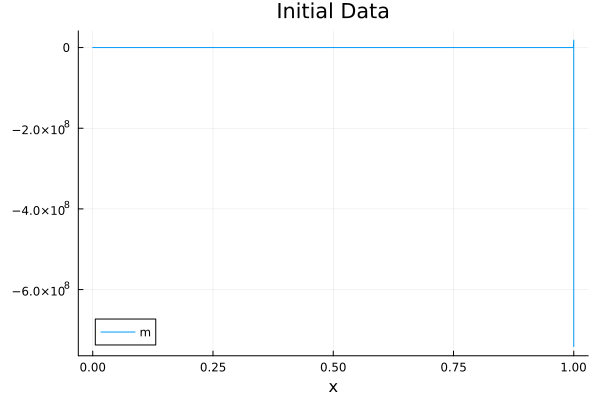

In [502]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

In [373]:
"""using TickTock
tick()
a=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5])#doublegrid(initX1)
tock()

tick()
f=Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
b=f(initX1)

#println(a.-b)
tock()

#plot(initX1, a.-init_gaussian_der(initX1,r0,sigma,A))
plot(doublegrid(initX1), a.-init_gaussian_der(doublegrid(initX1),r0,sigma,A))""";


In [374]:
state_array

1007×5 Matrix{Float64}:
 -4.77567e-22      -4.29438e-19  -6.02872e-14   2.1452e-10   -0.003
 -1.81302e-22      -1.57029e-19  -1.91789e-14   9.5953e-11   -0.002
 -4.15863e-23      -3.43642e-20  -3.24749e-15   2.414e-11    -0.001
  0.0               0.0           0.0           0.0           0.0
  1.87744e-24       7.50788e-21   3.05652e-15   2.44521e-11   0.00025
  2.24665e-23       4.96035e-20   1.8415e-14    9.84155e-11   0.000500001
  1.20188e-22       1.87731e-19   5.85685e-14   2.22809e-10   0.000750003
  4.39036e-22       5.2814e-19    1.36241e-13   3.98564e-10   0.00100001
  1.2549e-21        1.22311e-18   2.64393e-13   6.26622e-10   0.00125001
  3.02491e-21       2.47324e-18   4.56222e-13   9.07938e-10   0.00150003
  6.43988e-21       4.52979e-18   7.25165e-13   1.24348e-9    0.00175004
  1.24799e-20       7.69713e-18   1.08491e-12   1.63422e-9    0.00200006
  2.24732e-20       1.23353e-17   1.54938e-12   2.08116e-9    0.00225009
  ⋮                                               

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [375]:
using CSV, Tables
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [351]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [352]:
ginit=speed(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.12515684217329023


In [353]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

fixed grid

In [354]:
finaltime=1.3*3
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 20 dt is 0.0001564460527166128, t=0.003128921054332257 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 40 dt is 0.0001564460527166128, t=0.006257842108664509 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 60 dt is 0.0001564460527166128, t=0.009386763162996768 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 80 dt is 0.0001564460527166128, t=0.012515684217329036 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 100 dt is 0.0001564460527166128, t=0.015644605271661303 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 120 dt is 0.0001564460527166128, t=0.01877352632599357 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 140 dt is 0.0001564460527166128, t=0.02190244738032584 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 160 dt is 0.00015644605271661284, t=0.025031368434658106 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 180 dt is 0.00015



iteration 1380 dt is 0.0001564460527166128, t=0.2158955527489264 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 1400 dt is 0.0001564460527166128, t=0.21902447380325868 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 1420 dt is 0.0001564460527166128, t=0.22215339485759095 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 1440 dt is 0.00015644605271661284, t=0.22528231591192321 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 1460 dt is 0.00015644605271661276, t=0.22841123696625548 speed is 1.9974996521175532, dx/dt=15.979949360106348


iteration 1480 dt is 0.00015644605271661284, t=0.23154015802058775 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 1500 dt is 0.0001564460527166128, t=0.23466907907492002 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 1520 dt is 0.00015644605271661284, t=0.23779800012925228 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 1540 dt i



iteration 2740 dt is 0.00015644605271661284, t=0.4286621844434889 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 2760 dt is 0.0001564460527166128, t=0.4317911054978206 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 2780 dt is 0.0001564460527166128, t=0.43492002655215234 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 2800 dt is 0.0001564460527166128, t=0.43804894760648405 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 2820 dt is 0.0001564460527166128, t=0.44117786866081576 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 2840 dt is 0.0001564460527166128, t=0.4443067897151475 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 2860 dt is 0.0001564460527166128, t=0.4474357107694792 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 2880 dt is 0.00015644605271661284, t=0.4505646318238109 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 2900 dt is 0.00



iteration 4100 dt is 0.00015644605271661284, t=0.6414288161380454 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 4120 dt is 0.0001564460527166128, t=0.6445577371923771 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 4140 dt is 0.0001564460527166128, t=0.6476866582467088 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 4160 dt is 0.0001564460527166128, t=0.6508155793010405 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 4180 dt is 0.00015644605271661284, t=0.6539445003553722 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 4200 dt is 0.0001564460527166128, t=0.6570734214097039 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 4220 dt is 0.0001564460527166128, t=0.6602023424640356 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 4240 dt is 0.00015644605271661284, t=0.6633312635183674 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 4260 dt is 0.0001



iteration 5460 dt is 0.0001564460527166128, t=0.8541954478326018 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 5480 dt is 0.0001564460527166128, t=0.8573243688869335 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 5500 dt is 0.0001564460527166128, t=0.8604532899412652 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 5520 dt is 0.00015644605271661284, t=0.863582210995597 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 5540 dt is 0.0001564460527166128, t=0.8667111320499287 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 5560 dt is 0.00015644605271661284, t=0.8698400531042604 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 5580 dt is 0.0001564460527166128, t=0.8729689741585921 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 5600 dt is 0.00015644605271661276, t=0.8760978952129238 speed is 1.9974996521175532, dx/dt=15.979949360106348


iteration 5620 dt is 0.00015



iteration 6820 dt is 0.0001564460527166128, t=1.0669620795271584 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 6840 dt is 0.0001564460527166128, t=1.07009100058149 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 6860 dt is 0.0001564460527166128, t=1.0732199216358218 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 6880 dt is 0.0001564460527166128, t=1.0763488426901535 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 6900 dt is 0.0001564460527166128, t=1.0794777637444852 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 6920 dt is 0.0001564460527166128, t=1.082606684798817 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 6940 dt is 0.0001564460527166128, t=1.0857356058531487 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 6960 dt is 0.00015644605271661276, t=1.0888645269074804 speed is 1.9974996521175532, dx/dt=15.979949360106348


iteration 6980 dt is 0.000156446



iteration 8180 dt is 0.0001564460527166128, t=1.2797287112217148 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 8200 dt is 0.00015644605271661284, t=1.2828576322760465 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 8220 dt is 0.00015644605271661284, t=1.2859865533303783 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 8240 dt is 0.0001564460527166128, t=1.28911547438471 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 8260 dt is 0.0001564460527166128, t=1.2922443954390417 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 8280 dt is 0.00015644605271661284, t=1.2953733164933734 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 8300 dt is 0.0001564460527166128, t=1.298502237547705 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 8320 dt is 0.0001564460527166128, t=1.3016311586020368 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 8340 dt is 0.0001564



iteration 9540 dt is 0.00015644605271661284, t=1.4924953429162713 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 9560 dt is 0.00015644605271661284, t=1.495624263970603 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 9580 dt is 0.00015644605271661284, t=1.4987531850249347 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 9600 dt is 0.00015644605271661287, t=1.5018821060792664 speed is 1.997499652117552, dx/dt=15.979949360106337


iteration 9620 dt is 0.00015644605271661284, t=1.5050110271335981 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 9640 dt is 0.00015644605271661284, t=1.5081399481879298 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 9660 dt is 0.00015644605271661284, t=1.5112688692422616 speed is 1.9974996521175523, dx/dt=15.979949360106339


iteration 9680 dt is 0.0001564460527166128, t=1.5143977902965933 speed is 1.9974996521175528, dx/dt=15.979949360106342


iteration 9700 dt is 0.00



iteration 10900 dt is 0.00015644605271661338, t=1.7052619746108277 speed is 1.9974996521175452, dx/dt=15.979949360106284


iteration 10920 dt is 0.00015644605271661344, t=1.7083908956651594 speed is 1.9974996521175448, dx/dt=15.979949360106279


iteration 10940 dt is 0.00015644605271661344, t=1.7115198167194912 speed is 1.9974996521175445, dx/dt=15.979949360106279


iteration 10960 dt is 0.00015644605271661352, t=1.7146487377738229 speed is 1.9974996521175437, dx/dt=15.979949360106271


iteration 10980 dt is 0.00015644605271661352, t=1.7177776588281546 speed is 1.9974996521175437, dx/dt=15.979949360106271


iteration 11000 dt is 0.00015644605271661357, t=1.7209065798824863 speed is 1.997499652117543, dx/dt=15.979949360106264


iteration 11020 dt is 0.00015644605271661357, t=1.724035500936818 speed is 1.9974996521175428, dx/dt=15.979949360106264


iteration 11040 dt is 0.00015644605271661363, t=1.7271644219911497 speed is 1.997499652117542, dx/dt=15.979949360106259


iteration 11060 d



iteration 12260 dt is 0.00015644605271662666, t=1.9180286063053842 speed is 1.9974996521173758, dx/dt=15.979949360104929


iteration 12280 dt is 0.00015644605271662726, t=1.921157527359716 speed is 1.9974996521173682, dx/dt=15.979949360104866


iteration 12300 dt is 0.00015644605271662794, t=1.9242864484140476 speed is 1.9974996521173596, dx/dt=15.979949360104797


iteration 12320 dt is 0.00015644605271662861, t=1.9274153694683793 speed is 1.997499652117351, dx/dt=15.979949360104728


iteration 12340 dt is 0.00015644605271662932, t=1.930544290522711 speed is 1.9974996521173418, dx/dt=15.979949360104657


iteration 12360 dt is 0.0001564460527166301, t=1.9336732115770427 speed is 1.9974996521173318, dx/dt=15.979949360104577


iteration 12380 dt is 0.00015644605271663092, t=1.9368021326313745 speed is 1.9974996521173216, dx/dt=15.979949360104493


iteration 12400 dt is 0.0001564460527166317, t=1.9399310536857062 speed is 1.9974996521173114, dx/dt=15.979949360104413


iteration 12420 dt 



iteration 13620 dt is 0.00015644605271686662, t=2.1307952379999984 speed is 1.997499652114312, dx/dt=15.979949360080417


iteration 13640 dt is 0.00015644605271687714, t=2.133924159054339 speed is 1.9974996521141777, dx/dt=15.979949360079344


iteration 13660 dt is 0.00015644605271688806, t=2.1370530801086796 speed is 1.9974996521140382, dx/dt=15.979949360078228


iteration 13680 dt is 0.00015644605271689948, t=2.14018200116302 speed is 1.9974996521138926, dx/dt=15.979949360077061


iteration 13700 dt is 0.00015644605271691127, t=2.1433109222173607 speed is 1.997499652113742, dx/dt=15.979949360075857


iteration 13720 dt is 0.00015644605271692357, t=2.1464398432717013 speed is 1.9974996521135848, dx/dt=15.9799493600746


iteration 13740 dt is 0.00015644605271693637, t=2.149568764326042 speed is 1.9974996521134216, dx/dt=15.979949360073293


iteration 13760 dt is 0.0001564460527169496, t=2.1526976853803825 speed is 1.9974996521132526, dx/dt=15.979949360071943


iteration 13780 dt is 0



iteration 14980 dt is 0.00015644605271998918, t=2.3435618696962934 speed is 1.9974996520744432, dx/dt=15.979949359761468


iteration 15000 dt is 0.00015644605272010983, t=2.346690790750696 speed is 1.9974996520729027, dx/dt=15.979949359749146


iteration 15020 dt is 0.0001564460527202345, t=2.349819711805099 speed is 1.9974996520713109, dx/dt=15.979949359736409


iteration 15040 dt is 0.00015644605272036318, t=2.352948632859502 speed is 1.9974996520696682, dx/dt=15.979949359723268


iteration 15060 dt is 0.00015644605272049605, t=2.356077553913914 speed is 1.9974996520679715, dx/dt=15.979949359709696


iteration 15080 dt is 0.00015644605272063325, t=2.3592064749683255 speed is 1.9974996520662198, dx/dt=15.97994935969568


iteration 15100 dt is 0.00015644605272077485, t=2.362335396022737 speed is 1.9974996520644117, dx/dt=15.979949359681218


iteration 15120 dt is 0.00015644605272092105, t=2.365464317077156 speed is 1.997499652062545, dx/dt=15.979949359666284


iteration 15140 dt is 0

In [505]:
#print(T_interp);

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.03.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.03.gif")
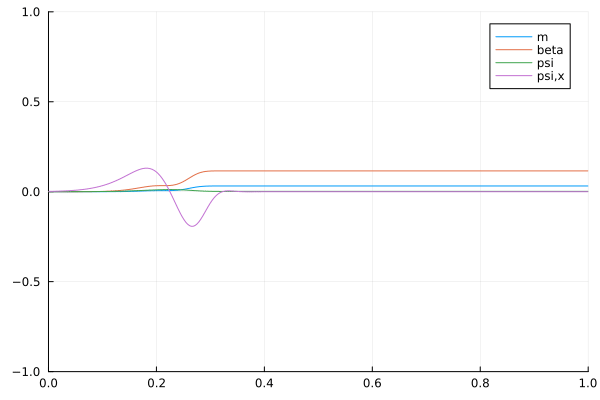

In [358]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10000:50:16147
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], ylim=[-1, 1],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04926157287086606.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/N2000_A0.04926157287086606.gif")
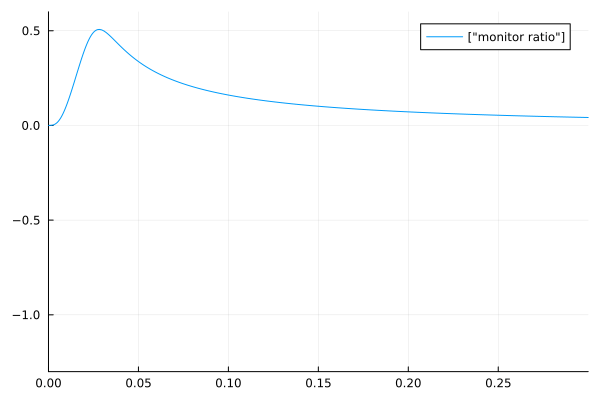

In [65]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

In [41]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif")
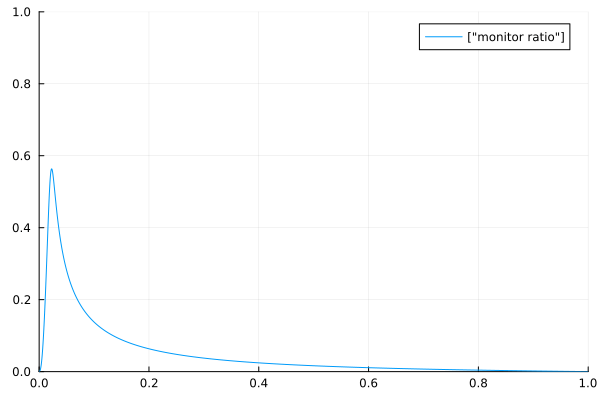

In [271]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

muninn animation

In [68]:
using Plots, CSV, DataFrames
import GR

lines = readlines(dir*"/res$res/data.txt")
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]

anim = @animate for n in 1:10
    
    for line in lines
        
    if occursin("Time", line)==true
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))

        end
    end



    #
    
    IJulia.clear_output(true)
    

    plot()
    
    
    plot!(grid[4:L-3], [m beta psi derpsi][4:L-3,:], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.001, 0.001],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1200)

LoadError: syntax: incomplete: "for" at In[68]:11 requires end

In [118]:
datagrid=Array{Float128}(undef, L)
datam=Array{Float128}(undef, L)
databeta=Array{Float128}(undef, L)
datapsi=Array{Float128}(undef, L)
dataderpsi=Array{Float128}(undef, L)

lines = readlines(dir*"/res$res/data.txt")

for line in lines
    if occursin("Time", line)==true
        plot(grid, m)
        
        
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
        
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))
        elseif a==[]
            #println(length(datagrid))
            #println(length(grid))
            #datagrid=cat(dims=2,datagrid, grid)
            datagrid=[datagrid; grid]
            datam=cat(dims=2,datam, m)
            databeta=cat(dims=2,databeta, beta)
            datapsi=cat(dims=2,datapsi, psi)
            dataderpsi=cat(dims=2,dataderpsi, derpsi)
        end
    end
    
end


In [119]:
datagrid

5796-element Vector{Any}:
    8.34319962899321883561303658422435691e-4956
    2.05206491026800433201677921073574507e-4936
 -nan
    8.34319963676342897893866671733368366e-4956
    1.53904868514964416335782103718351843e-4936
    2.77150719072578205953599890496588243e-4938
    1.19445898260724901253333516414690294e-4946
    1.53904868634410314596507031525083490e-4936
    2.77150776406609371101565222808974947e-4938
 -nan
    1.53904868753856212857231959331815136e-4936
    2.77150833740640536249530555121361651e-4938
    8.34319965554143682530893953901455664e-4956
    ⋮
    0.96
    0.965
    0.97
    0.975
    0.98
    0.985
    0.99
    0.995
    1.0
    1.005
    1.01
    1.015

In [117]:
A = Matrix{Int}(undef, 0, 2)  # 0x2 array of Int
B = rand(5, 2)
A = [A; B] 

5×2 Matrix{Float64}:
 0.12618    0.261235
 0.238235   0.840988
 0.200322   0.354143
 0.347195   0.854355
 0.0130686  0.727983

In [21]:
parse(Float64,"1")

1.0

In [47]:
dir*"/res$res/data.txt"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/data.txt"

In [ ]:
with open(dir) as f:
    for line in f:

        index = line.find("Time")
        if index==1:
            time.append(line[index+7:len(line)-1])
            auxgrid=[]
            auxm=[]
            auxbeta=[]
            auxpsi=[]
            auxderpsi=[]

        else:
                a=line.split()
                if a!=[]:
                    auxgrid.append(float(a[0]))
                    auxm.append(float(a[1]))
                    auxbeta.append(float(a[2]))
                    auxpsi.append(float(a[3]))
                    auxderpsi.append(float(a[4]))
                elif a==[]:
                    grid.append(auxgrid)
                    m.append(auxm)
                    beta.append(auxbeta)
                    psi.append(auxpsi)
                    derpsi.append(auxderpsi)
        datatime.append(time)
        datagrid.append(grid)
        datam.append(m)
        databeta.append(beta)
        datapsi.append(psi)
        dataderpsi.append(derpsi)

In [59]:
a=[ "ola tudo bem"]
split(a," ")

LoadError: MethodError: no method matching split(::Vector{String}, ::String)
[0mClosest candidates are:
[0m  split([91m::T[39m, ::Any; limit, keepempty) where T<:AbstractString at strings/util.jl:592

In [62]:
using DelimitedFiles

readdlm(dir*"/res$res/data.txt", ',',Int)

LoadError: unexpected character 'T' after quoted field at row 1 column 1

In [360]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [361]:
twod_epsilon(dt,dx)

3.12500000000000000000000000000000000e-02

In [363]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [147]:
twod_epsilon(dt,dx)

0.3125